<a href="https://colab.research.google.com/github/Thanatipz/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
shopping_data = pd.read_csv('/content/drive/MyDrive/DSC_DPDM/customer_shopping_data.csv')
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


###เราจะลบ Price ของ Record ที่เป็นClothing,Cash,Metrocity ออก เพื่อจำลอง Missing Data

###ทำให้ Price Missing

In [9]:
import numpy as np


In [6]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing')&
 (shopping_data['payment_method']=='Cash')&
 (shopping_data['shopping_mall']=='Metrocity')]

In [11]:
willbemissing['price']= np.nan

<ipython-input-11-0b0dba1fb0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbemissing['price']= np.nan


In [12]:
willbemissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


แยก data ส่วนที่ไม่ missing ออกมา

In [14]:
nomissing = shopping_data[(shopping_data['category']!='Clothing')|
 (shopping_data['payment_method']!='Cash')|
 (shopping_data['shopping_mall']!='Metrocity')]

จับdataกลับมารวมกัน

In [16]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape

(99457, 10)

In [18]:
new_shopping_data.isnull().any()#ตรวจสอบค่าNull

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [20]:
new_shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,97173.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [17]:
shopping_data.isnull().any()#ตรวจสอบค่าNull

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [19]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Example

## Fix

###1.ignore(ลบออกไปเลย)

Quiz
data หายไปกี่%
mean data รวมหลังแก้ missingเป็นเท่าไหร่

In [21]:
new_shopping_data_drop = new_shopping_data.dropna()

In [23]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

###2.เติมด้วยunknow*เราจะเติมข้อมูล categorical

In [70]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###3.เติมด้วยค่าเฉลี่ย

In [26]:
mean_val = new_shopping_data_drop['price'].mean()

In [30]:
new_shopping_data_fillmean = new_shopping_data.fillna({'price':mean_val})

In [31]:
new_shopping_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###4.เติมด้วยค่าเฉลี่ยของกลุ่ม

Quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Metrocity
- mean หลังเติมด้วยค่าเฉลี่ย Cash + Metrocity

In [67]:
mean_clothing = new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

In [69]:
new_missing_data_fillmean_clothing = new_shopping_data.fillna({'price':mean_clothing} )
new_missing_data_fillmean_clothing.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [42]:
mean_metro = new_shopping_data_drop[new_shopping_data_drop['shopping_mall'] == 'Metrocity']['price'].mean()
mean_metro

644.7815816767501

In [45]:
new_missing_data_fillmean_mega = new_shopping_data.fillna({'price':mean_metro})
new_missing_data_fillmean_mega

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,644.781582,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,644.781582,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,644.781582,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,644.781582,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,644.781582,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [46]:
willbe_dup = shopping_data[(shopping_data['category']=='Clothing')&
 (shopping_data['payment_method']=='Cash')&
 (shopping_data['shopping_mall']=='Metrocity')]

In [47]:
new_shopping_dup = pd.concat([shopping_data,willbe_dup])

In [48]:
new_shopping_dup.sort_values(by='invoice_date')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [49]:
new_shopping_dup.duplicated().any()

True

In [50]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


###1.Drop duplicated

In [51]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [54]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

## Example

## Fix

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [55]:
from matplotlib import pyplot as plt

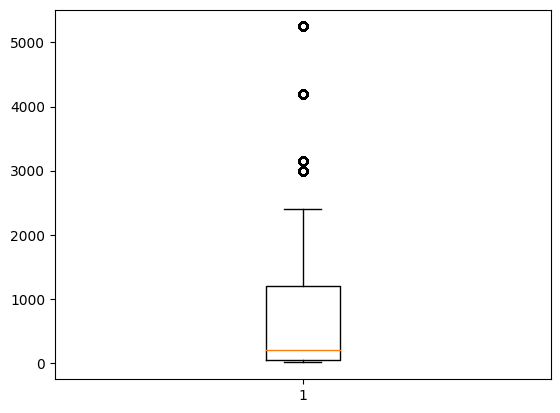

In [56]:
ret= plt.boxplot(shopping_data['price'])

## Example

In [58]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7de0b274a590>,
 'caps': [<matplotlib.lines.Line2D at 0x7de0b27480a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de0b27490c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7de0b274b4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de0b4c1a470>],
 'means': []}

In [64]:
ret['fliers'][0].get_ydata().shape

(5024,)

In [59]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [60]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [63]:
ret['whiskers'][1].get_ydata()[1]

2400.68

## Fix

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix